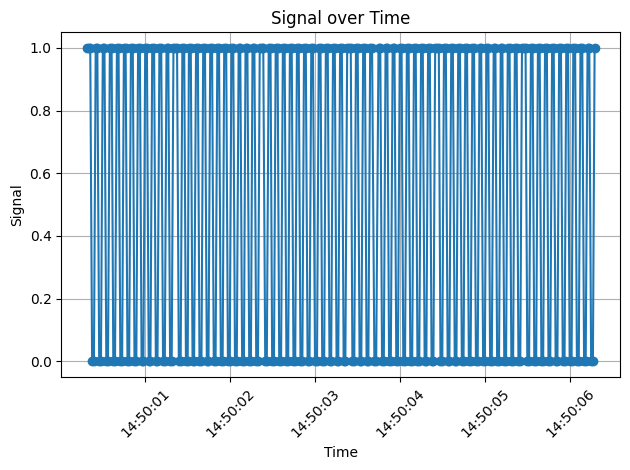

calculate 11.718479925657963


In [7]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt


def plot_csv_data(filename):
    # Lists to store time and signal data
    times = []
    signals = []
    
    # Read data from the CSV file
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            times.append(datetime.strptime(row['Time'], '%Y-%m-%d %H:%M:%S.%f'))
            signals.append(float(row['Signal']))
    
    # Plot the data
    plt.plot(times, signals, marker='o', linestyle='-')
    plt.title('Signal over Time')
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def calculate_frequency(filename):
    # Count the number of signals
    signal_changes = 0
    previous_signal = None
    
    # Read data from the CSV file
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            current_signal = float(row['Signal'])
            if previous_signal is not None:
                if previous_signal == 1 and current_signal == 0:
                    signal_changes += 1
            previous_signal = current_signal
    
    # Calculate the total time duration
    total_duration = 0
    
    # Read the first and last recorded times to calculate total duration
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        start_time = datetime.strptime(next(reader)[0], '%Y-%m-%d %H:%M:%S.%f')
        end_time = datetime.strptime(list(reader)[-1][0], '%Y-%m-%d %H:%M:%S.%f')
        total_duration = (end_time - start_time).total_seconds()
    
    # Calculate frequency
    frequency = signal_changes / total_duration
    
    return frequency

# Example usage
filename = 'data_12.csv'
plot_csv_data(filename)
frequency = calculate_frequency(filename)
print(f'calculate {frequency}')
